In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nba_2017 = pd.read_csv("NBA_17.csv")
nba_2017.head()

,Team,Pts,Opp Pts,Avg. Mrg,Pace,Off Eff,Def Eff,Net Rtg,EFg%,Opp EFg%,Ts%,Opp Ts%,Reb Rate,Eff Pts,Opp Eff Pts,Win,Loss
0,Golden State Warriors,115.89,104.26,11.63,98.97,116.50,104.70,11.80,0.563,0.486,0.597,0.525,50.53,143.83,112.17,67,15
1,San Antonio Spurs,105.33,98.13,7.20,93.50,111.94,104.07,7.86,0.524,0.492,0.564,0.530,51.41,125.16,107.55,61,21
2,Houston Rockets,115.34,109.57,5.77,99.34,115.53,109.90,5.63,0.545,0.519,0.583,0.556,50.17,129.79,124.28,55,27
3,Los Angeles Clippers,108.67,104.38,4.29,95.55,113.30,109.03,4.27,0.537,0.506,0.574,0.546,49.94,123.22,116.06,51,31
4,Toronto Raptors,106.85,102.65,4.21,94.28,112.77,108.50,4.27,0.517,0.507,0.561,0.550,50.69,119.68,113.00,51,31


In [7]:
nba_features_df = nba_2017.drop("Team", axis=1)
feature_names_no_team = nba_features_df.columns
feature_names_no_team

Index(['Pts', 'Opp Pts', 'Avg. Mrg', 'Pace', 'Off Eff', 'Def Eff', 'Net Rtg',
       'EFg%', 'Opp EFg%', 'Ts%', 'Opp Ts%', 'Reb Rate', 'Eff Pts',
       'Opp Eff Pts', 'Win', 'Loss'],
      dtype='object')

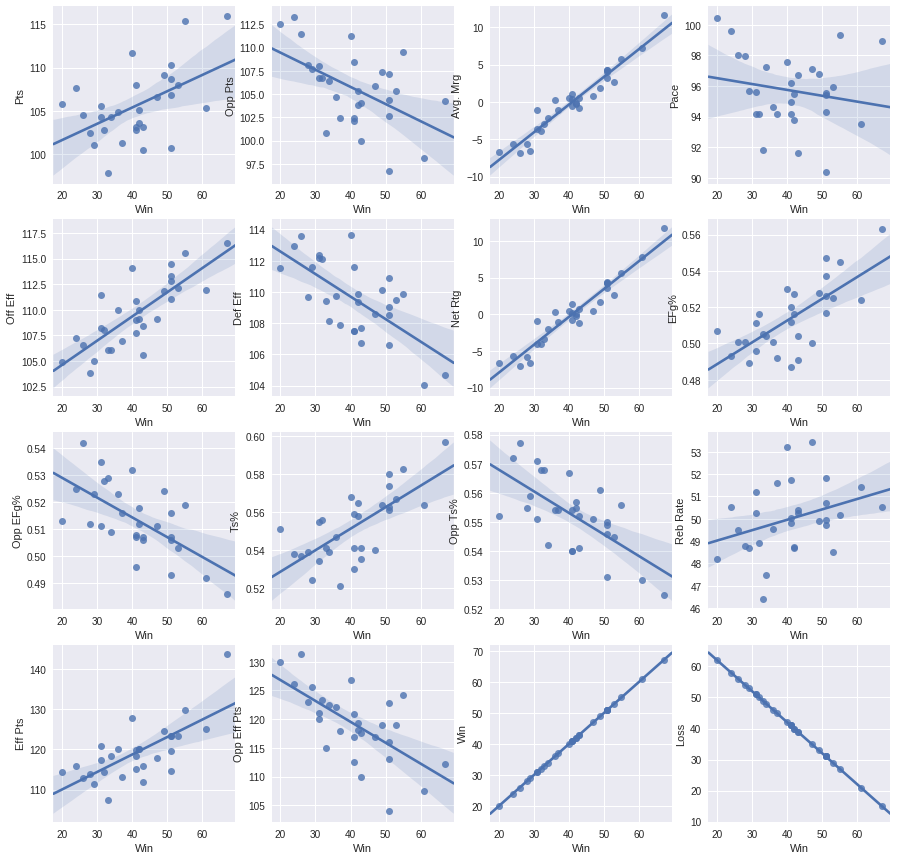

In [8]:
fig = plt.figure(figsize=(15,15))

for i, col in enumerate(feature_names_no_team):
    fig.add_subplot(4,4,1+i)
    sns.regplot(feature_names_no_team[14], feature_names_no_team[i], data=nba_2017)

In [9]:
from sklearn.linear_model import LinearRegression

linear_models = [LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),]

for feat, model in zip(feature_names_no_team[:14], linear_models):
    print("Fitting %s on Wins in Linear Regression Model" %feat)
    features = nba_2017[[feat]]
    target = nba_2017["Win"]
    model.fit(features,target)

Fitting Pts on Wins in Linear Regression Model
Fitting Opp Pts on Wins in Linear Regression Model
Fitting Avg. Mrg on Wins in Linear Regression Model
Fitting Pace on Wins in Linear Regression Model
Fitting Off Eff on Wins in Linear Regression Model
Fitting Def Eff on Wins in Linear Regression Model
Fitting Net Rtg on Wins in Linear Regression Model
Fitting EFg% on Wins in Linear Regression Model
Fitting Opp EFg% on Wins in Linear Regression Model
Fitting Ts% on Wins in Linear Regression Model
Fitting Opp Ts% on Wins in Linear Regression Model
Fitting Reb Rate on Wins in Linear Regression Model
Fitting Eff Pts on Wins in Linear Regression Model
Fitting Opp Eff Pts on Wins in Linear Regression Model


In [10]:
def MSE(actual, prediction):
    result = sum((actual-prediction)**2) / len(actual)
    return result


for feat, model in zip(feature_names_no_team[:14], linear_models):
    features = nba_2017[[feat]]
    target = nba_2017["Win"]
    print("Scoring Linear Regression on %s" %feat)
    print("MSE: %f" %MSE(target, model.predict(features)))

Scoring Linear Regression on Pts
MSE: 89.818574
Scoring Linear Regression on Opp Pts
MSE: 88.623618
Scoring Linear Regression on Avg. Mrg
MSE: 8.489743
Scoring Linear Regression on Pace
MSE: 117.067360
Scoring Linear Regression on Off Eff
MSE: 45.294472
Scoring Linear Regression on Def Eff
MSE: 66.945270
Scoring Linear Regression on Net Rtg
MSE: 9.305956
Scoring Linear Regression on EFg%
MSE: 58.682606
Scoring Linear Regression on Opp EFg%
MSE: 72.796513
Scoring Linear Regression on Ts%
MSE: 62.093039
Scoring Linear Regression on Opp Ts%
MSE: 68.312076
Scoring Linear Regression on Reb Rate
MSE: 107.057710
Scoring Linear Regression on Eff Pts
MSE: 60.668718
Scoring Linear Regression on Opp Eff Pts
MSE: 69.843619


In [11]:
#Normalize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nba_2017_scaled = scaler.fit_transform(nba_2017.drop("Team", axis=1))
nba_2017_scaled = pd.DataFrame(nba_2017_scaled, columns = feature_names_no_team)
nba_2017_scaled

linear_models = [LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),
                 LinearRegression(), LinearRegression(),]

for feat, model in zip(feature_names_no_team[:14], linear_models):
    print("Fitting %s on Wins in Linear Regression Model" %feat)
    features = nba_2017_scaled[[feat]]
    target = nba_2017_scaled["Win"]
    model.fit(features,target)

Fitting Pts on Wins in Linear Regression Model
Fitting Opp Pts on Wins in Linear Regression Model
Fitting Avg. Mrg on Wins in Linear Regression Model
Fitting Pace on Wins in Linear Regression Model
Fitting Off Eff on Wins in Linear Regression Model
Fitting Def Eff on Wins in Linear Regression Model
Fitting Net Rtg on Wins in Linear Regression Model
Fitting EFg% on Wins in Linear Regression Model
Fitting Opp EFg% on Wins in Linear Regression Model
Fitting Ts% on Wins in Linear Regression Model
Fitting Opp Ts% on Wins in Linear Regression Model
Fitting Reb Rate on Wins in Linear Regression Model
Fitting Eff Pts on Wins in Linear Regression Model
Fitting Opp Eff Pts on Wins in Linear Regression Model


In [12]:
for feat, model in zip(feature_names_no_team[:14], linear_models):
    features = nba_2017_scaled[[feat]]
    target = nba_2017_scaled["Win"]
    print("Scoring Linear Regression on %s" %feat)
    print("MSE: %f" %MSE(target, model.predict(features)))

Scoring Linear Regression on Pts
MSE: 0.742302
Scoring Linear Regression on Opp Pts
MSE: 0.732427
Scoring Linear Regression on Avg. Mrg
MSE: 0.070163
Scoring Linear Regression on Pace
MSE: 0.967499
Scoring Linear Regression on Off Eff
MSE: 0.374334
Scoring Linear Regression on Def Eff
MSE: 0.553267
Scoring Linear Regression on Net Rtg
MSE: 0.076909
Scoring Linear Regression on EFg%
MSE: 0.484980
Scoring Linear Regression on Opp EFg%
MSE: 0.601624
Scoring Linear Regression on Ts%
MSE: 0.513166
Scoring Linear Regression on Opp Ts%
MSE: 0.564563
Scoring Linear Regression on Reb Rate
MSE: 0.884774
Scoring Linear Regression on Eff Pts
MSE: 0.501394
Scoring Linear Regression on Opp Eff Pts
MSE: 0.577220


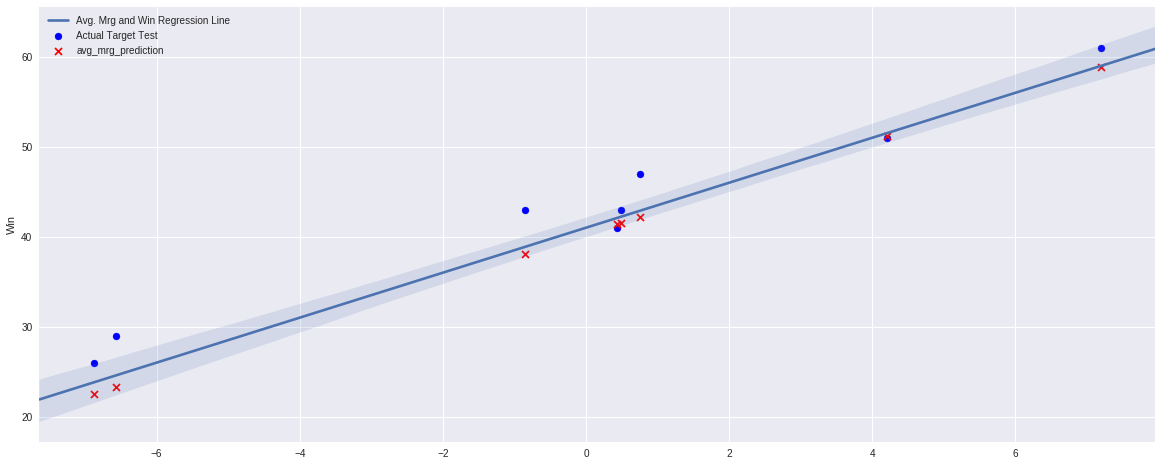

In [31]:
# Avg. Mrg provides the lowest error. Let's see that on a plot.
from sklearn.model_selection import train_test_split

(features_train, features_test,
 target_train, target_test) = train_test_split(nba_2017[["Avg. Mrg"]], nba_2017["Win"], random_state=20)

scaler = LinearRegression()
scaler.fit(features_train, target_train)
avg_mrg_prediction = scaler.predict(features_test)

plt.figure(figsize=(20,8))

plt.scatter(features_test, target_test, marker = "o", color="blue", label="Actual Target Test")
plt.scatter(features_test, avg_mrg_prediction, marker = "x", color="red", label="avg_mrg_prediction")

sns.regplot(nba_2017[["Avg. Mrg"]], nba_2017["Win"], scatter=False, label = "Avg. Mrg and Win Regression Line")
plt.legend()